# Reconstruction: $m=0$ 

The spatial reconstruction of the loudest $m=0$ QQNM compared with a second-order PT prediction, plotted on the sphere in Mollweide projection. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CCE
from qnmfits.spatial_mapping_functions import *

plt.style.use("stylesheet.mplstyle")
fig_width = 246.0 * (1.0 / 72.27)
fig_height = fig_width / 1.618

In [2]:
id = "0001"
sim = CCE.SXS_CCE(id)

chif = sim.chif_mag
Mf = sim.Mf

l_max = 8
n_max = 7

t0 = 17

In [3]:
mapping = [(2, 2, 0, 1, 2, -2, 0, -1)]
map = mapping[0]

QNMs = [
    (lam, 0, n, p)
    for lam in np.arange(2, l_max + 1)
    for n in np.arange(0, n_max + 1)
    for p in (-1, +1)
]

best_fit = mapping_multimode_ringdown_fit(
    sim.times,
    sim.h,
    modes=QNMs.copy(),
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=t0,
    mapping_modes=mapping,
    spherical_modes=[(lam, 0) for lam in np.arange(2, l_max + 1)],
)

In [ ]:
lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi / 2, np.pi / 2, 200)
Lon, Lat = np.meshgrid(lon, lat)

map = (2, 2, 0, 1, 2, -2, 0, -1)

# Use the symmetric B prediction for comparison

def Qmu_B_sym(indices, chif, l_max, **kwargs):
    return [
        (
            Qmu_B(indices, chif, l_max, s1=-2, s2=0)[0]
            + Qmu_B(indices, chif, l_max, s1=0, s2=-2)[0]
        )
        / 2
    ]


F = spatial_reconstruction(np.pi / 2 - Lat, Lon, best_fit, map, l_max)
G_B_sym = spatial_prediction_quadratic(
    np.pi / 2 - Lat, Lon, map, l_max, chif, Qmu_B_sym
)

print(spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_B_sym))

(0.03165768035185035, 7.190763735936686e-07, (0.0012754211875670707+9.171252423604176e-10j))


/tmp/ipykernel_30288/2341414249.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("figs/reconstruction_memory.png", dpi=600, bbox_inches="tight")
/data/vault/rvnd2/python_envs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


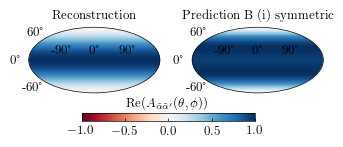

In [6]:
fig, ax = plt.subplots(
    figsize=(fig_width, fig_height),
    nrows=1,
    ncols=2,
    subplot_kw={"projection": "mollweide"},
)

ax[0].title.set_text("Reconstruction")
ax[0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.RdBu, vmin=-1, vmax=1)
ax[0].set_xticks(np.radians([-90, 0, 90]))
ax[0].set_yticks(np.radians([-60, 0, 60]))

ax[1].title.set_text("Prediction B (i) symmetric")
im3 = ax[1].pcolormesh(Lon, Lat, np.real(G_B_sym), cmap=plt.cm.RdBu, vmin=-1, vmax=1)
ax[1].set_xticks(np.radians([-90, 0, 90]))
ax[1].set_yticks(np.radians([-60, 0, 60]))

cax = fig.add_axes([0.25, 0.21, 0.51, 0.04])
fig.colorbar(im3, cax=cax, orientation="horizontal")
fig.text(
    0.5,
    0.28,
    r"$\mathrm{Re}(A_{\Tilde{\alpha} \Tilde{\alpha}'}(\theta , \phi))$",
    ha="center",
)

fig.savefig("figs/reconstruction_memory.png", dpi=600, bbox_inches="tight")
plt.show()